# Proyek Analisis Data: Bike Sharing
- Nama: Revandho Vianuara Dirgantoro
- Email: rvd210594@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Apakah ada hari - hari tertentu dalam seminggu yang memiliki tingkat peminjaman lebih tinggi ?
- Apakah ada korelasi antara cuaca (misalnya: hujan, salju) dengan tingkat peminjaman sepeda ?

## Menyaipkan semua library yang dibuthkan

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [26]:
day_df = pd.read_csv("data\day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df = pd.read_csv("data\hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [28]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
print("Duplikasi day_df: ", day_df.duplicated().sum())

day_df.info()

Duplikasi day_df:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [30]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [31]:
print("Duplikasi hour_df: ", hour_df.duplicated().sum())

hour_df.info()

Duplikasi hour_df:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [32]:
day_df["weekday"] = day_df["weekday"].apply(str)
day_df["season"] = day_df["season"].apply(str)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.5+ KB


## Exploratory Data Analysis (EDA)

### Explore ...

In [33]:
day_df.describe()

,instant,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [34]:
day_df.groupby(by=['weekday']).agg({
    "casual": ["mean", "max", "min", 'sum'],
    "registered": ["mean", "max", "min", 'sum']
})

casual                     registered                    
                mean   max min     sum         mean   max   min     sum
weekday                                                                
0        1338.295238  3283  54  140521  2890.533333  5657   451  303506
1         674.133333  3065   2   70784  3663.990476  6435    20  384719
2         556.182692  1348   9   57843  3954.480769  6697   573  411266
3         551.144231  2562   9   57319  3997.394231  6946   432  415729
4         590.961538  1405  15   61460  4076.298077  6781   416  423935
5         752.288462  2469  38   78238  3938.000000  6917  1129  409552
6        1465.257143  3410  57  153852  3085.285714  5966   570  323955

In [35]:
day_df.groupby(by=['weekday', 'weathersit']).agg({
    "casual": ["mean", "max", "min"],
    "registered": ["mean", "max", "min"]
})

casual              registered            
                           mean   max  min         mean   max   min
weekday weathersit                                                 
0       1           1396.270270  3283   54  2952.202703  5657   451
        2           1235.900000  2613  114  2804.533333  4866   491
        3            120.000000   120  120   907.000000   907   907
1       1            702.363636  2557   41  3783.287879  6435   887
        2            654.216216  3065   42  3579.918919  6015   746
        3            111.000000   220    2  1282.500000  2545    20
2       1            651.387097  1348   64  4338.516129  6697  1376
        2            440.605263  1278    9  3459.000000  6033   573
        3            178.500000   315   69  2709.000000  4324  1538
3       1            688.312500  2562   25  4646.015625  6946  1137
        2            376.969697  1263   53  3300.181818  6844  1368
        3            118.142857   254    9  1354.000000  2199   432
4       1            685.970149  1405   15  4328.955224  6781   416
        2            444.764706  1008   74  3827.147059  6642  1699
        3            126.000000   179   46  1257.333333  1689   577
5       1            865.952381  1807   54  4212.730159  6917  1367
        2            577.634146  2469   38  3515.853659  6370  1129
6       1           1667.358209  3410   93  3308.522388  5966   856
        2           1191.323529  3155   67  2819.647059  5209   654
        3            408.500000  1264   57  1604.000000  3195   570

In [36]:
day_df.groupby(by=['weekday', 'holiday', 'weathersit']).agg({
    "casual": ["mean", "max", "min"],
    "registered": ["mean", "max", "min"]
})

casual               registered            
                                   mean   max   min         mean   max   min
weekday holiday weathersit                                                  
0       0       1           1396.270270  3283    54  2952.202703  5657   451
                2           1235.900000  2613   114  2804.533333  4866   491
                3            120.000000   120   120   907.000000   907   907
1       0       1            626.482143  1208    41  3899.000000  6435  1229
                2            584.968750  1233    42  3780.156250  6015   746
                3            111.000000   220     2  1282.500000  2545    20
        1       1           1127.300000  2557   217  3135.300000  5172   887
                2           1097.400000  3065   117  2298.400000  4604   883
2       0       1            651.387097  1348    64  4338.516129  6697  1376
                2            440.621622  1278     9  3537.000000  6033   674
                3            178.500000   315    69  2709.000000  4324  1538
        1       2            440.000000   440   440   573.000000   573   573
3       0       1            658.571429  1383    25  4642.920635  6946  1137
                2            376.969697  1263    53  3300.181818  6844  1368
                3            118.142857   254     9  1354.000000  2199   432
        1       1           2562.000000  2562  2562  4841.000000  4841  4841
4       0       1            683.769231  1405    15  4425.153846  6781   416
                2            444.764706  1008    74  3827.147059  6642  1699
                3            126.000000   179    46  1257.333333  1689   577
        1       1            757.500000   955   560  1202.500000  1470   935
5       0       1            876.606557  1807    54  4262.131148  6917  1367
                2            577.634146  2469    38  3515.853659  6370  1129
        1       1            541.000000   642   440  2706.000000  2928  2484
6       0       1           1667.358209  3410    93  3308.522388  5966   856
                2           1191.323529  3155    67  2819.647059  5209   654
                3            408.500000  1264    57  1604.000000  3195   570

In [37]:
day_df.groupby(by=['weekday', 'holiday', 'season']).agg({
    "casual": ["mean", "max", "min"],
    "registered": ["mean", "max", "min"],
})

casual               registered            
                               mean   max   min         mean   max   min
weekday holiday season                                                  
0       0       1        535.185185  2207    54  1694.259259  3685   451
                2       1860.461538  3283   120  3126.076923  5147   907
                3       1809.730769  2613  1050  3514.538462  5657  2367
                4       1178.692308  2454   220  3273.269231  5453  2115
1       0       1        243.350000   982    41  2405.100000  5171   746
                2        729.083333  1208   195  3718.583333  5927  1676
                3        920.782609  1233   568  4769.608696  6407  3272
                4        455.695652  1001     2  4122.826087  6435    20
        1       1        284.166667   502   117  1516.166667  2627   883
                2       1768.000000  2557  1198  3735.666667  5172  2549
                3       2088.666667  3065  1236  3054.000000  4069  2115
                4       1161.666667  1514   874  4459.666667  5172  3603
2       0       1        226.166667  1051     9  2640.500000  5085   674
                2        669.923077  1348   167  4155.038462  6033  1628
                3        865.592593  1281   204  4790.518519  6697  2506
                4        430.230769   922    69  4228.692308  6693  1009
        1       1        440.000000   440   440   573.000000   573   573
3       0       1        200.800000   997     9  2410.280000  5315   432
                2        644.111111  1173   168  4190.962963  6433  1368
                3        850.384615  1383   118  4943.884615  6820  1878
                4        409.440000   979    50  4357.360000  6946   655
        1       3       2562.000000  2562  2562  4841.000000  4841  4841
4       0       1        222.160000  1005    15  2672.040000  5187   416
                2        775.307692  1334   166  4424.961538  6456  1506
                3        856.178571  1405   153  4842.428571  6781  1689
                4        446.086957  1008   139  4525.739130  6736  2419
        1       4        757.500000   955   560  1202.500000  1470   935
5       0       1        282.807692   884    38  2573.500000  4122  1129
                2       1014.560000  2469   172  4292.080000  6248  1299
                3       1041.259259  1511   417  4709.370370  6917  2825
                4        680.208333  1603   178  4282.250000  6640  1697
        1       2        642.000000   642   642  2484.000000  2484  2484
                4        440.000000   440   440  2928.000000  2928  2928
6       0       1        585.370370  3155    67  1846.962963  4681   654
                2       1975.961538  3410   121  3358.230769  5325   674
                3       1906.074074  3160   226  3678.888889  5883   889
                4       1408.320000  3031    57  3497.720000  5966   570

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

In [38]:
day_registered_df = day_df.groupby(by='weekday').agg({
    "registered": "sum",
})

In [39]:
day_casual_df = day_df.groupby(by='weekday').agg({
    "casual": "sum",
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12380\2472965094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12380\2472965094.py:3: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12380\2472965094.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "sabtu"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12380\2472965094.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

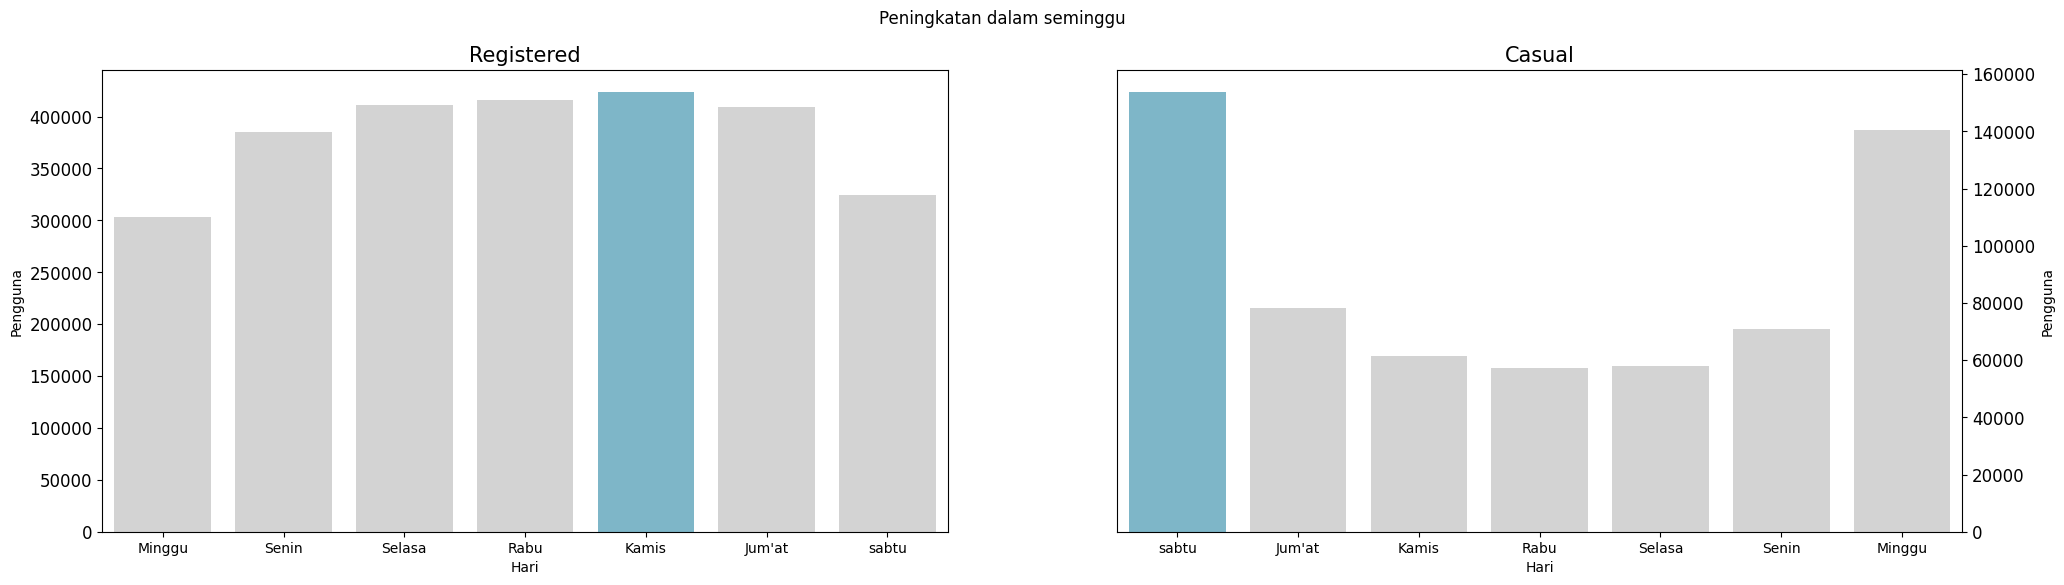

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(
    y="registered",
    x="weekday",
    data=day_registered_df,
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_ylabel("Pengguna")
ax[0].set_xlabel("Hari")
ax[0].set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "sabtu"])
ax[0].set_title("Registered", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    y="casual",
    x="weekday",
    data=day_casual_df,
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"],
    ax=ax[1]
)
ax[1].set_ylabel("Pengguna")
ax[1].set_xlabel("Hari")
ax[1].set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "sabtu"])
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Casual", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Peningkatan dalam seminggu")
plt.show()

### Pertanyaan 2: 

In [41]:
day_cuaca_registered = day_df.groupby(by=["weekday", "weathersit", "workingday"]).agg({
    "registered": "sum"
})

In [42]:
day_cuaca_casual = day_df.groupby(by=["weekday", "weathersit", "workingday"]).agg({
    "casual": "sum"
})

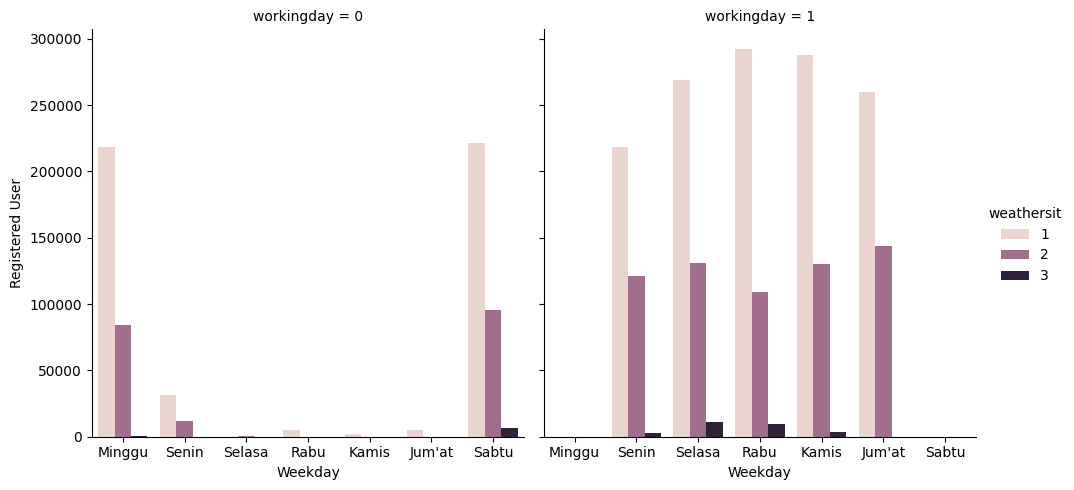

In [43]:
cr = sns.catplot(
    data=day_cuaca_registered,
    kind="bar",
    x="weekday",
    y="registered",
    col="workingday",
    hue="weathersit"
)
cr.set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "Sabtu"])
cr.set_xlabels("Weekday")
cr.set_ylabels("Registered User")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

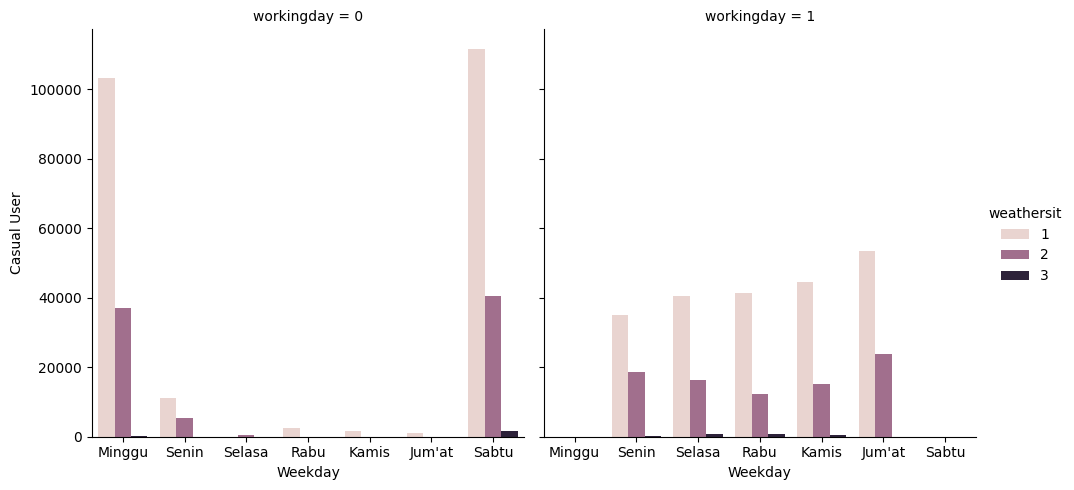

In [44]:
cs = sns.catplot(
    data=day_cuaca_casual,
    kind="bar",
    x="weekday",
    y="casual",
    col="workingday",
    hue="weathersit"
)
cs.set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "Sabtu"])
cs.set_xlabels("Weekday")
cs.set_ylabels("Casual User")
plt.show

## Conclusion

- Pada pertanyaan pertama explorasi data diambil sampel pengguna biasa dan pengguna member, dari eksplorasi data yang telah dilakukan pengguna biasa memakai layanan terbanyak pada hari Sabtu dan hari Minggu menduduki nomor dua terbanyak, dapat disimpulkan bahwa pengguna biasa menggunakan layanan untuk kebutuhan rekreasi dan hiburan. Pengguna member cenderung stabil menggunakan layanan pada hari kerja namun pengguna paling banyak pada hari kamis, dapt kita ambil bahwa pengguna member menggunakan layanan untuk meningkatkan efisiensi dalam mobilitas kerja, entah itu menuju kantor, menuju tempat meeting terdekat, dan menuju setasiun ketika pulang kerja.
- Hasil dari eksplorasi pertanyaan kedua membuktikan bahwa ada 3 jenis sampel cuaca 1) Clear, Few clouds, Partly cloudy, Partly cloudy, 2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. Pengguna terdaftar memiliki kecenderungan menggunakan layanan sepeda pada hari - hari kerja, namun ketika cuaca berkabut tidak banyak menggunakan layanan dan pengguna paling sedikit ketika cuaca sedang tidak bagus seperti hujan ringan, badai, dan turun salju. Untuk pengguna biasa banyak menggunakan pelayanan pada akhir pekan, cuaca cerah berawan menempati urutan yang tertinggi, cuaca berkabut dan badai tidak banyak pengguna biasa yang menggunakan pelayanan, ini dikarenakan mereka akan menunggu cuaca untuk bagus dulu. Hal ini dapat ditarik kesimpulan bahwa cuaca dapat mempengaruhi para pengguna dalam menggunakan layanan sepeda, sehingga ketika cuaca sedang tidak bersahabat maka pengguna cenderung memilih untuk jalan kaki atau menggunakan transportasi umum.